# Behavioral Cloning

In [1]:
import pickle
import random
import numpy as np
import cv2
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
import numpy as np
import matplotlib.pyplot as plt
from skimage.filters import rank
from skimage import exposure 
from skimage.morphology import disk
%matplotlib inline
import csv

random.seed(12)

# (1) Visualizing the Data Provided by Udacity

In [2]:
lines = []
with open('data/data/driving_log.csv') as csvfile:
    reader = csv.reader(csvfile)
    for line in reader:
        lines.append(line)

a = np.asarray(lines)
a = a[a[:,3].argsort()]
y_train = []

for line in lines:
    source_path = line[0]
    measurment = float(line[3])
    y_train.append(measurment)


hist, bins = np.histogram(y_train, 35)
index = 0
for i in hist:
    k = int(i/10)
    print(bins[index], sep=' ', end='', flush=True)
    for j in range(k):
        print('.', sep=' ', end='', flush=True)
    print (i, " "),
    index = index + 1



-0.94269544  
-0.8871898171430  
-0.8316842342861  
-0.7761786514292  
-0.7206730685712  
-0.6651674857142  
-0.6096619028572  
-0.55415632.11  
-0.498650737143..27  
-0.443145154286....45  
-0.387639571429...36  
-0.332133988571..............144  
-0.276628405714............125  
-0.221122822857..........107  
-0.16561724.......................................396  
-0.110111657143........................................................567  
-0.0546060742857..................................................................................................................................................................................................................................................................................................................................................................................................................................................................................4665  
0.000899508571429....................................369  
0.0564

<Container object of 35 artists>

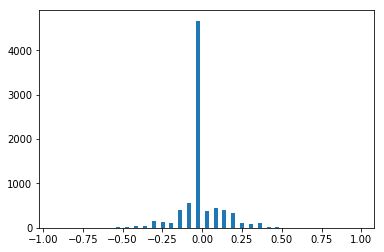

In [3]:
hist, bins = np.histogram(y_train, 35)
height = (bins[:-1] + bins[1:]) / 2
plt.bar(height, hist, align='center', width= 0.025)

As it can be seen from above hystogram, around 'Zero' angle, there are more than 4000 sample images, while rest all the turns/measurements are less than 1000. Data is imbalance.
I tried running the [1] architecture straight on this data, but the AI suicided with the car at multiple turns. 

It is sure that the data needs balancing. 

To do so, turns/measurements other than Zero needs to be brought into comparison to that of Zero degree turns.
To do so, more data was generated for positive (+) values of turns and negative (-) values of turns. 
Data was collected only at the curvatures to reduce the data collection at straight roads.
let's see that data.


### (2) Data for Positive curvature values

[ 11  21  40  92  73 191 288 274 174  54  18   4]
[-0.6500001  -0.53288578 -0.41577147 -0.29865715 -0.18154283 -0.06442852
  0.0526858   0.16980012  0.28691443  0.40402875  0.52114307  0.63825738
  0.7553717 ]
-0.650000111  
-0.53288578333321  
-0.415771466667.40  
-0.29865715...92  
-0.181542833333..73  
-0.0644285166667......191  
0.0526858.........288  
0.169800116667.........274  
0.286914433333.....174  
0.40402875.54  
0.52114306666718  
0.6382573833334  


<Container object of 35 artists>

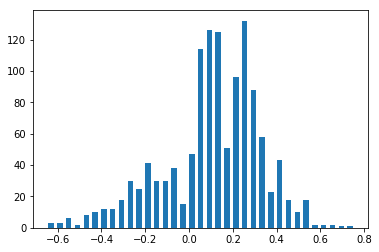

In [4]:
lines = []

with open('train2/driving_log.csv') as csvfile:
    reader = csv.reader(csvfile)
    for line in reader:
        lines.append(line)

y_train = []

for line in lines:
    source_path = line[0]
    measurment = float(line[3])
    if measurment != 0.0:
        y_train.append(measurment)


 

hist, bins = np.histogram(y_train,12)
print (hist)
print (bins)
index = 0
for i in hist:
    k = int(i/30)
    print(bins[index], sep=' ', end='', flush=True)
    for j in range(k):
        print('.', sep=' ', end='', flush=True)
    print (i, " "),
    index = index + 1

hist, bins = np.histogram(y_train, 35)
height = (bins[:-1] + bins[1:]) / 2
plt.bar(height, hist, align='center', width= 0.025)

### (3) Data for negative curvature

samples:  1479
[  3   7  39 239 492 367 149 122  42  13   5   1]
[-0.8269565 -0.6856019 -0.5442473 -0.4028927 -0.2615381 -0.1201835
  0.0211711  0.1625257  0.3038803  0.4452349  0.5865895  0.7279441
  0.8692987]
-0.82695653  
-0.68560197  
-0.5442473.39  
-0.4028927.......239  
-0.2615381................492  
-0.1201835............367  
0.0211711....149  
0.1625257....122  
0.3038803.42  
0.445234913  
0.58658955  
0.72794411  


<Container object of 35 artists>

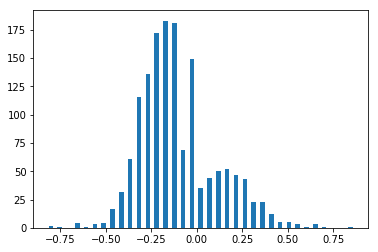

In [5]:
lines = []

with open('train1/driving_log.csv') as csvfile:
    reader = csv.reader(csvfile)
    for line in reader:
        lines.append(line)

y_train = []

for line in lines:
    source_path = line[0]
    measurment = float(line[3])
    if measurment != 0.0:
        y_train.append(measurment)
    
print ("samples: ", len(y_train))

hist, bins = np.histogram(y_train,12)
print (hist)
print (bins)
index = 0
for i in hist:
    k = int(i/30)
    print(bins[index], sep=' ', end='', flush=True)
    for j in range(k):
        print('.', sep=' ', end='', flush=True)
    print (i, " "),
    index = index + 1

hist, bins = np.histogram(y_train, 35)
height = (bins[:-1] + bins[1:]) / 2
plt.bar(height, hist, align='center', width= 0.025)

### (4) Random data with 2 laps

samples:  3813
[ 136   32   77  116  391  868 1322  488  160   36   22  165]
[-1.         -0.83333333 -0.66666667 -0.5        -0.33333333 -0.16666667
  0.          0.16666667  0.33333333  0.5         0.66666667  0.83333333
  1.        ]
-1.0....136  
-0.833333333333.32  
-0.666666666667..77  
-0.5...116  
-0.333333333333.............391  
-0.166666666667............................868  
0.0............................................1322  
0.166666666667................488  
0.333333333333.....160  
0.5.36  
0.66666666666722  
0.833333333333.....165  


<Container object of 35 artists>

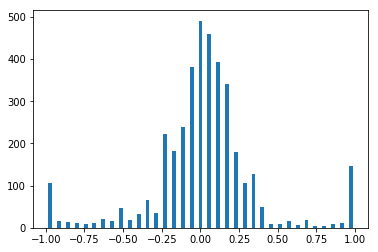

In [6]:
lines = []

with open('train/driving_log.csv') as csvfile:
    reader = csv.reader(csvfile)
    for line in reader:
        lines.append(line)

y_train = []

for line in lines:
    source_path = line[0]
    measurment = float(line[3])
    if measurment != 0.0:
        y_train.append(measurment)


 
print ("samples: ", len(y_train))
hist, bins = np.histogram(y_train,12)
print (hist)
print (bins)
index = 0
for i in hist:
    k = int(i/30)
    print(bins[index], sep=' ', end='', flush=True)
    for j in range(k):
        print('.', sep=' ', end='', flush=True)
    print (i, " "),
    index = index + 1

hist, bins = np.histogram(y_train, 35)
height = (bins[:-1] + bins[1:]) / 2
plt.bar(height, hist, align='center', width= 0.025)

### (5) Combining all the above data, with avoiding the Zero turn/measurements.
Assuming the data with exact zero turn value is not very useful to train the car, I tried to avoid that date.

samples:  10207
-1.0....140  
-0.833333333333.41  
-0.666666666667...116  
-0.5............383  
-0.333333333333.............................................1358  
-0.166666666667............................................................................................2784  
0.0..................................................................................................2969  
0.166666666667.......................................................1652  
0.333333333333...............477  
0.5...92  
0.66666666666727  
0.833333333333.....168  


<Container object of 35 artists>

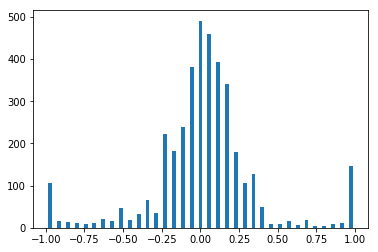

In [7]:
lines = []

with open('train1/driving_log.csv') as csvfile:
    reader = csv.reader(csvfile)
    for line in reader:
        lines.append(line)

y_train1 = []

for line in lines:
    source_path = line[0]
    measurment = float(line[3])
    if measurment != 0.0:
        y_train1.append(measurment)

lines = []

with open('train2/driving_log.csv') as csvfile:
    reader = csv.reader(csvfile)
    for line in reader:
        lines.append(line)



for line in lines:
    source_path = line[0]
    measurment = float(line[3])
    if measurment != 0.0:
        y_train1.append(measurment)  

lines = []

with open('data/data/driving_log.csv') as csvfile:
    reader = csv.reader(csvfile)
    for line in reader:
        lines.append(line)

for line in lines:
    source_path = line[0]
    measurment = float(line[3])
    if measurment != 0.0:
        y_train1.append(measurment)

lines = []

with open('train/driving_log.csv') as csvfile:
    reader = csv.reader(csvfile)
    for line in reader:
        lines.append(line)

for line in lines:
    source_path = line[0]
    measurment = float(line[3])
    if measurment != 0.0:
        y_train1.append(measurment)
 
print ("samples: ", len(y_train1))
hist, bins = np.histogram(y_train1,12)

index = 0

for i in hist:
    k = int(i/30)
    print(bins[index], sep=' ', end='', flush=True)
    for j in range(k):
        print('.', sep=' ', end='', flush=True)
    print (i, " "),
    index = index + 1

    
hist, bins = np.histogram(y_train, 35)
height = (bins[:-1] + bins[1:]) / 2
plt.bar(height, hist, align='center', width= 0.025)

Above histogram looks much balanced/spread compared to the histogram of data provided by Udacity.

In [8]:
#reffered from https://stackoverflow.com/questions/43240604/python-local-normalization-in-opencv

def local_normalize(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)
    gray,u,v = cv2.split(gray)
    float_gray = gray.astype(np.float32) / 255.0

    blur = cv2.GaussianBlur(float_gray, (0, 0), sigmaX=2, sigmaY=2)
    num = float_gray - blur

    blur = cv2.GaussianBlur(num*num, (0, 0), sigmaX=20, sigmaY=20)
    den = cv2.pow(blur, 0.5)

    gray = num / den

    cv2.normalize(gray, dst=gray, alpha=0.0, beta=1.0, norm_type=cv2.NORM_MINMAX)
    gray = gray*255
    gray = gray.astype(np.uint8)
    yuv = cv2.merge((gray,u,v))
    return cv2.cvtColor(yuv, cv2.COLOR_YUV2BGR)

In [9]:
#https://stackoverflow.com/questions/32609098/how-to-fast-change-image-brightness-with-python-opencv


def random_brightness(img):
    value = random.randint(0, 25)
    
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    h, s, v = cv2.split(hsv)

    lim = 255 - value
    v[v > lim] = 255
    v[v <= lim] += value

    final_hsv = cv2.merge((h, s, v))
    img = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2BGR)
    
    #img = cv2.cvtColor(final_hsv, cv2.COLOR_BGR2GRAY)
    #img = np.sum(img/3, axis=3, keepdims=True)

    #normalizations of sets
    #img = np.subtract(img, 128.0)
    #img = np.divide(img, 128.0)
    return img

In [10]:
def compare_images(img1, img2, text1 = 'img1', text2 = 'img2'):
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(48, 18))
    f.tight_layout()
    ax1.imshow(img1)
    ax1.set_title(text1, fontsize=40)
    ax2.imshow(img2)
    ax2.set_title(text2, fontsize=40)
    plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

In [11]:
def random_perspective_transform(img):
    v1 = random.randint(0, 3)
    v2 = random.randint(0, 3)
    v3 = random.randint(29, 32)
    v4 = random.randint(29, 32)
    
    src = np.float32([[v1,v2],[v3,v2],[v3,v4],[v1,v4]])
    dst = np.float32([[0,0],[32,0],[32,32],[0,32]])

    tx = cv2.getPerspectiveTransform(src,dst)

    dst = cv2.warpPerspective(img,tx,(32,32))
    return dst

In [12]:
def yuv_select(img):
    yuv = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)

    return yuv

In [13]:
def image_prepare(img):
    img = img[55:138, :, :]
    img = cv2.resize(img, (200, 66), interpolation=cv2.INTER_AREA)
    img = random_brightness(img)
    img = local_normalize(img)
    return cv2.cvtColor(img, cv2.COLOR_BGR2YUV)

#### (6) As per [1] the images were converted into YUV space. let's try to visualize the original frames/images and those in Y channel

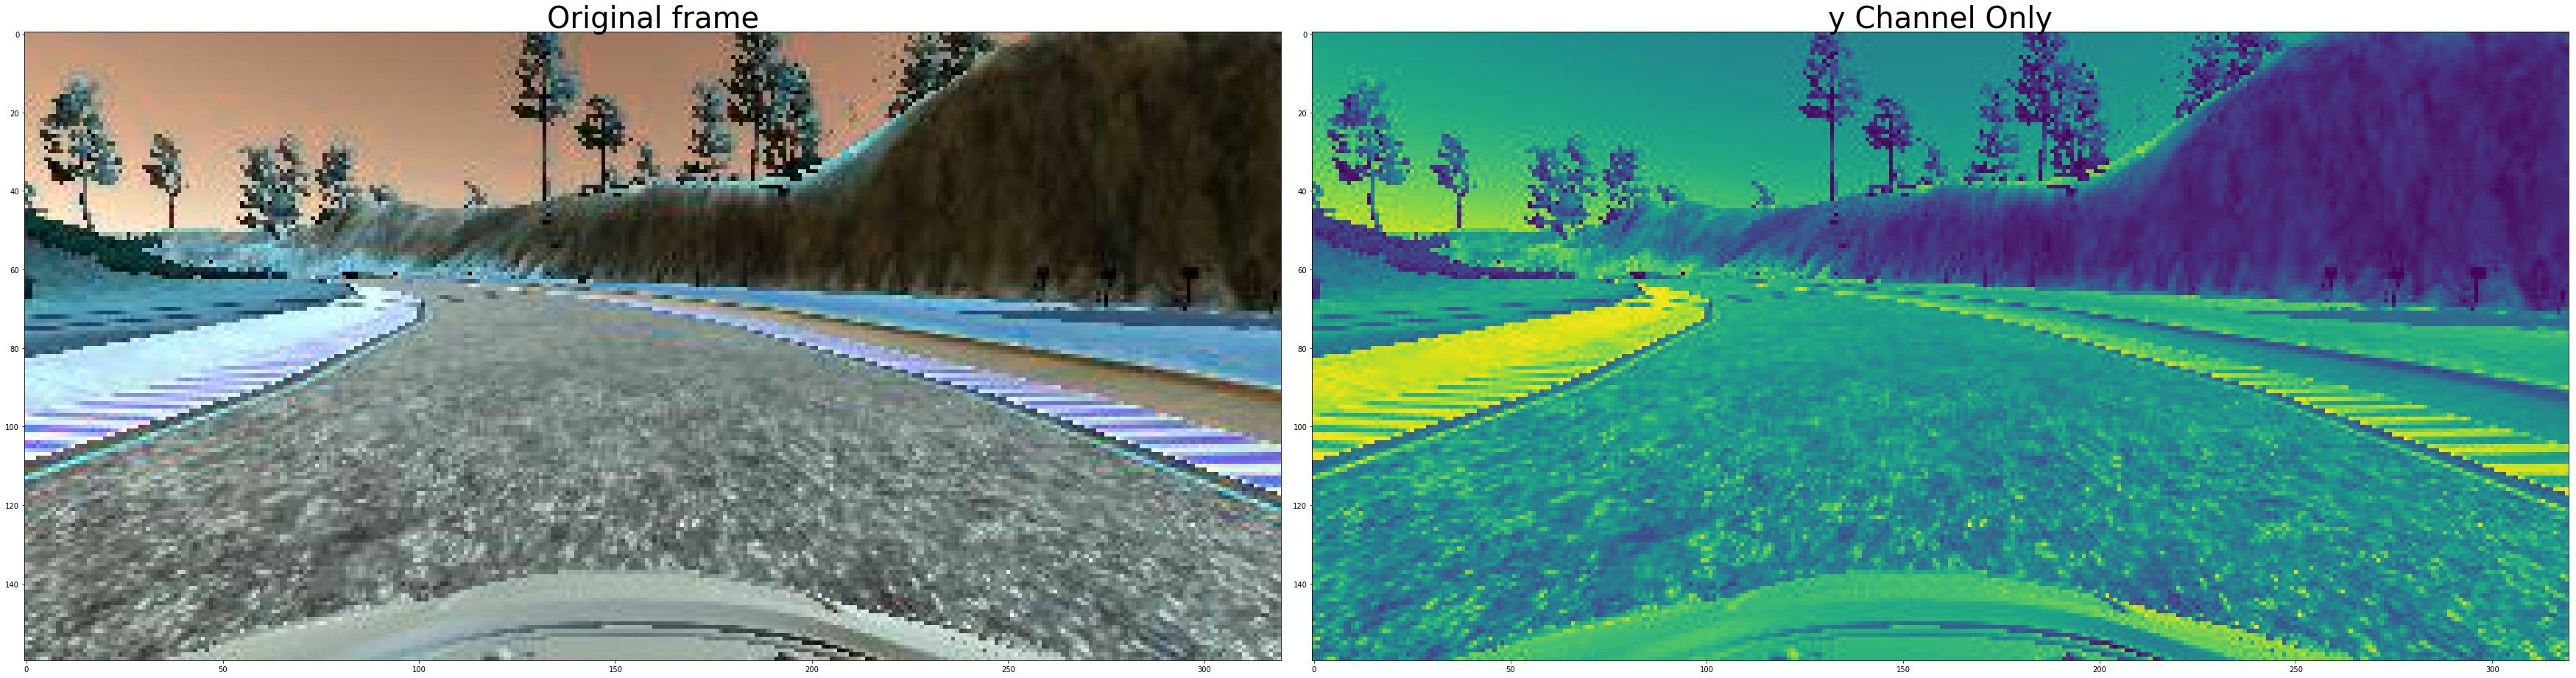

In [14]:
img = cv2.imread('train/IMG/center_2018_08_15_21_05_24_058.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)
y,u,v = cv2.split(gray)
compare_images(img, y, text1 = 'Original frame', text2 = 'y Channel Only')

### (7) The 'Y' channel shows the yellow(here bluish green lines) boarder lines very clear, even in the shadows.
Let's see how those images appear in whole YUV converted, localy normalized, and YUV converted after localy normalized

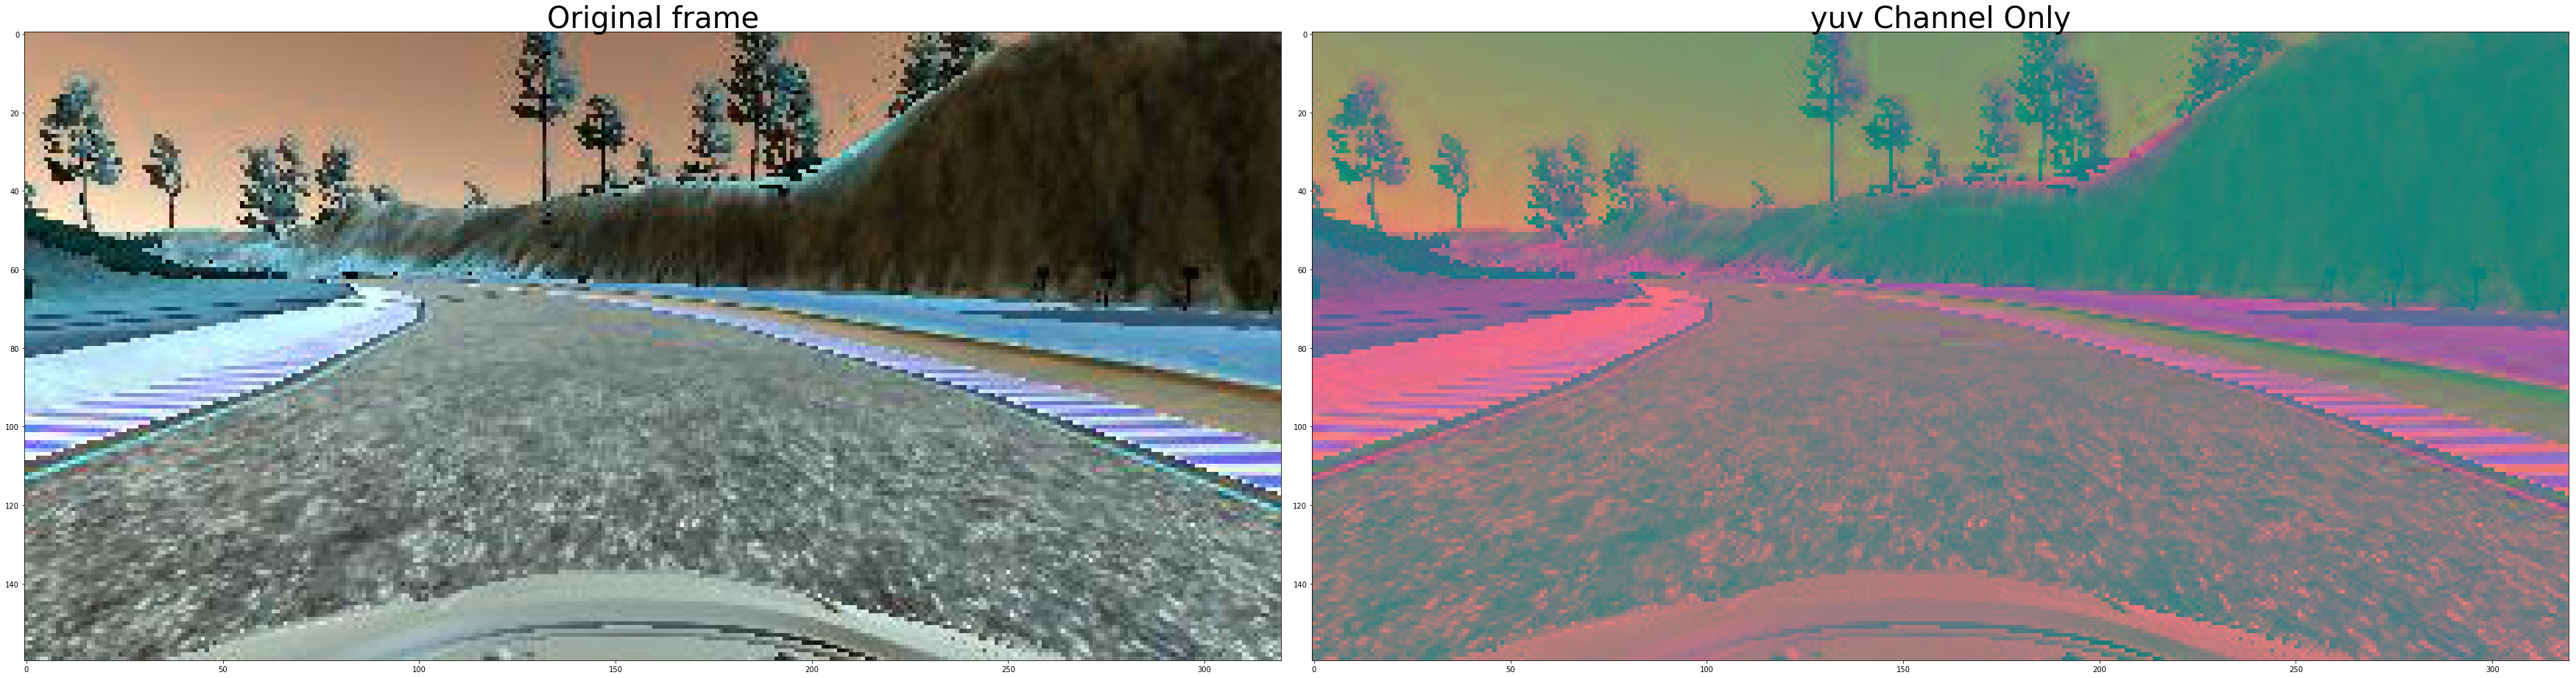

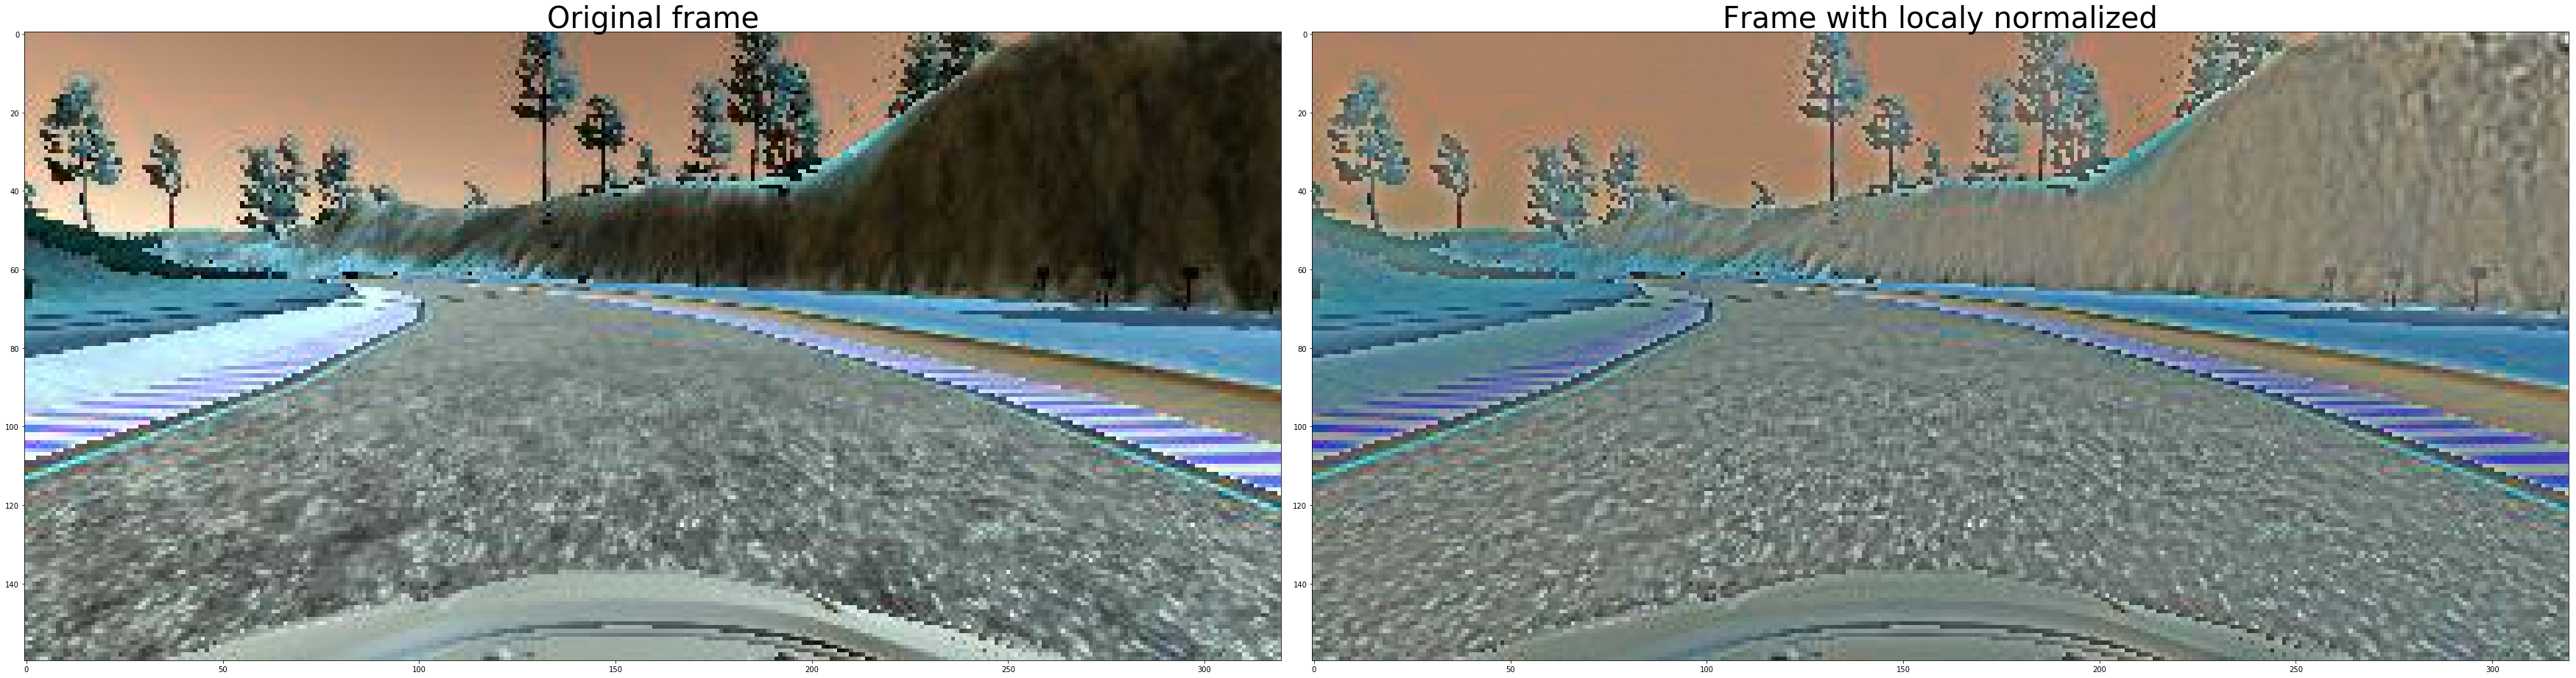

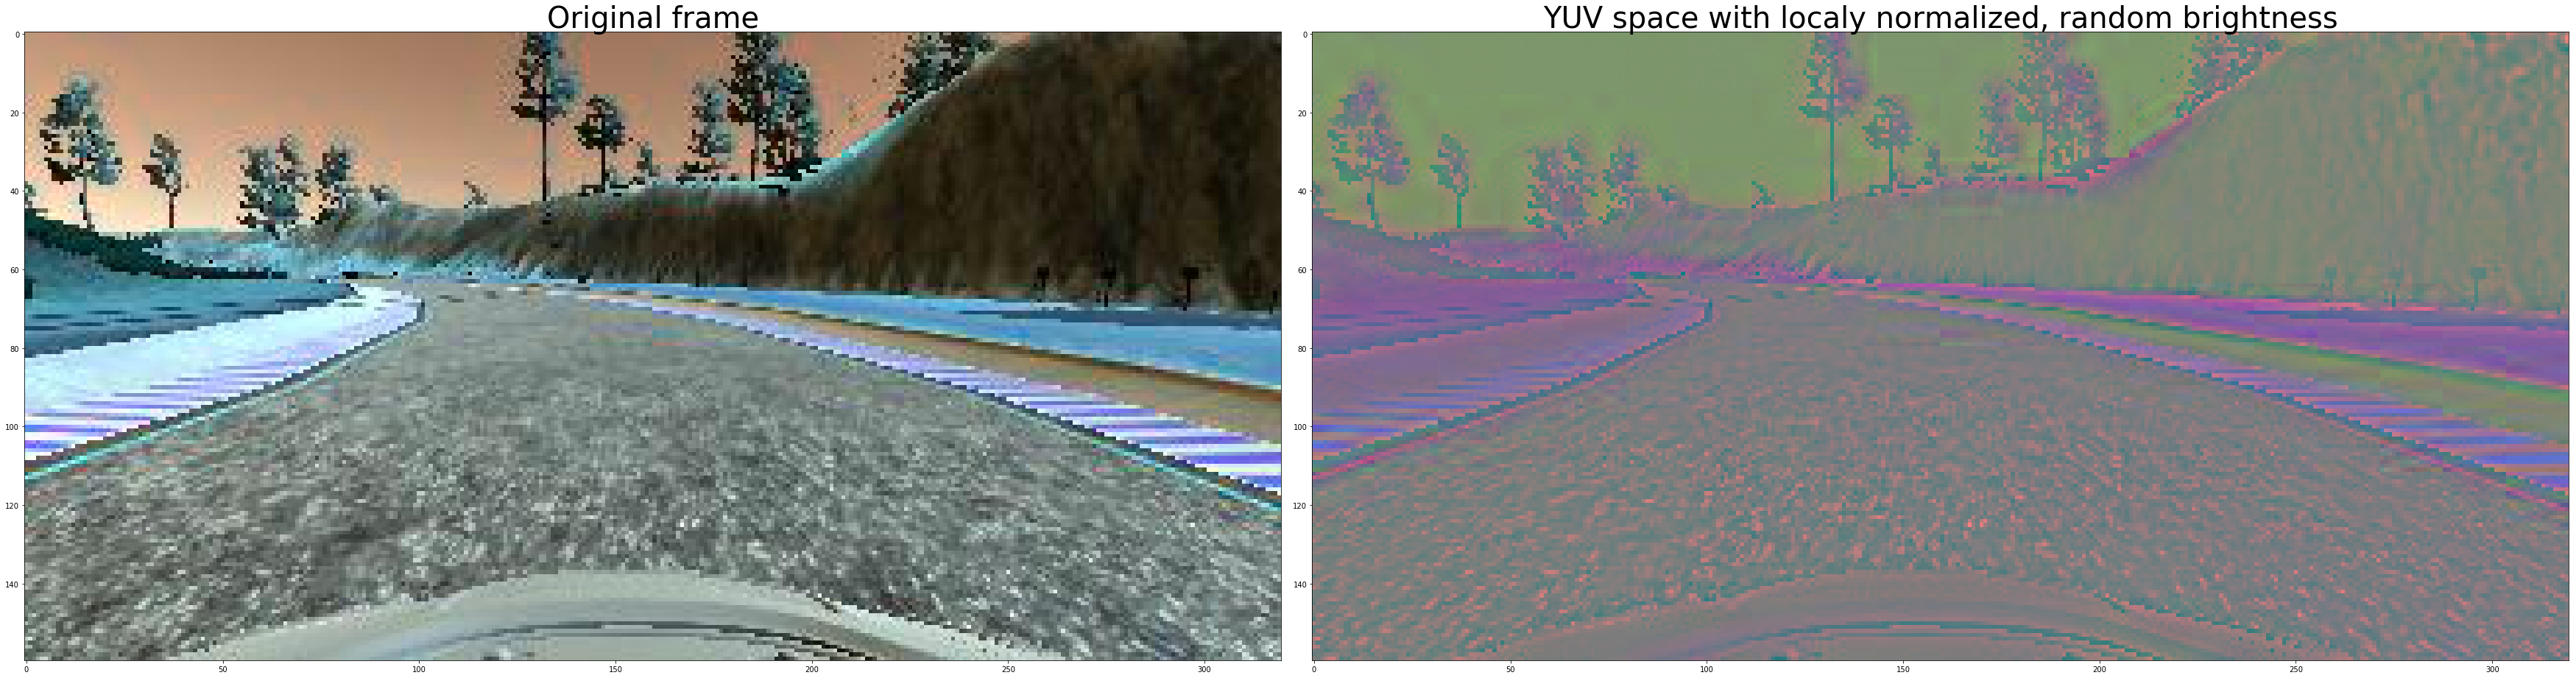

In [15]:
img = cv2.imread('train/IMG/center_2018_08_15_21_05_24_058.jpg')


compare_images(img, yuv_select(img), text1 = 'Original frame', text2 = 'yuv Channel Only')
compare_images(img, local_normalize(img), text1 = 'Original frame', text2 = 'Frame with localy normalized')
compare_images(img, yuv_select(local_normalize(img)), text1 = 'Original frame', text2 = 'YUV space with localy normalized, random brightness')


YUV Converted after Locally normalized images looked good for the road border and shadows, but it didn't really help much in the couple of trials I did with it. Maybe I could try again with this working model.
while in the image, there was Sun light, and also, breaking created smoke with a bit of brightness variations, I decided to use random brightness in the images.

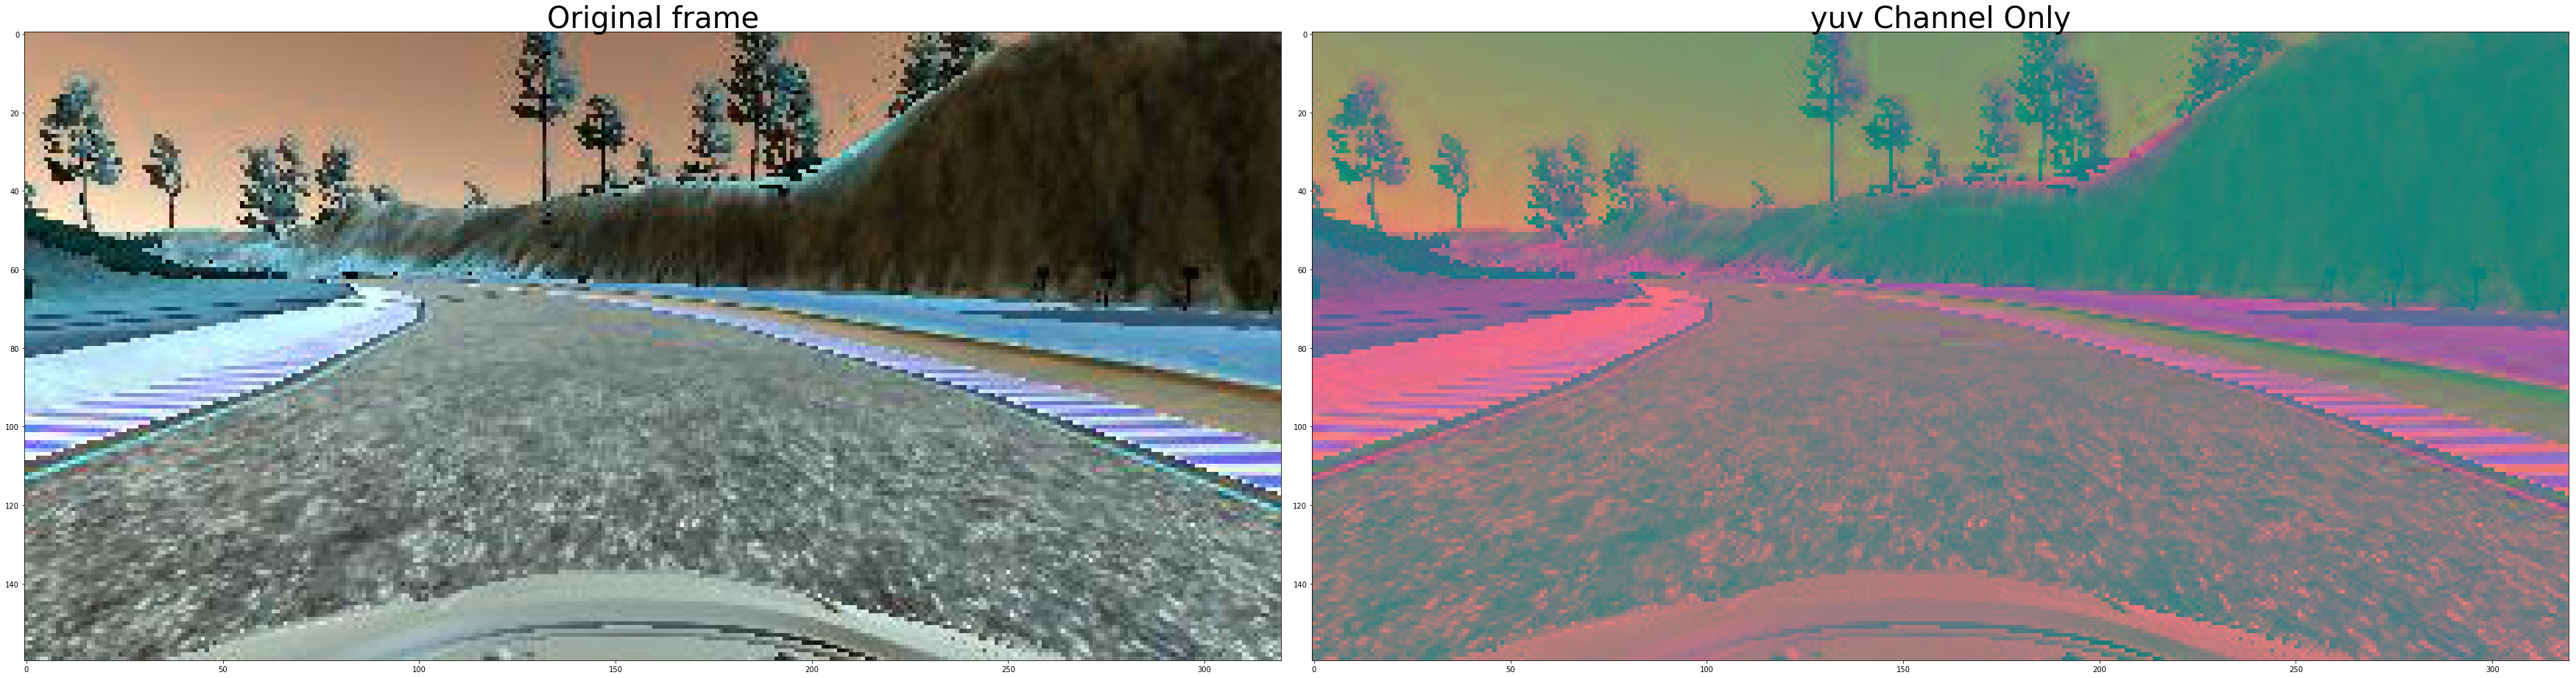

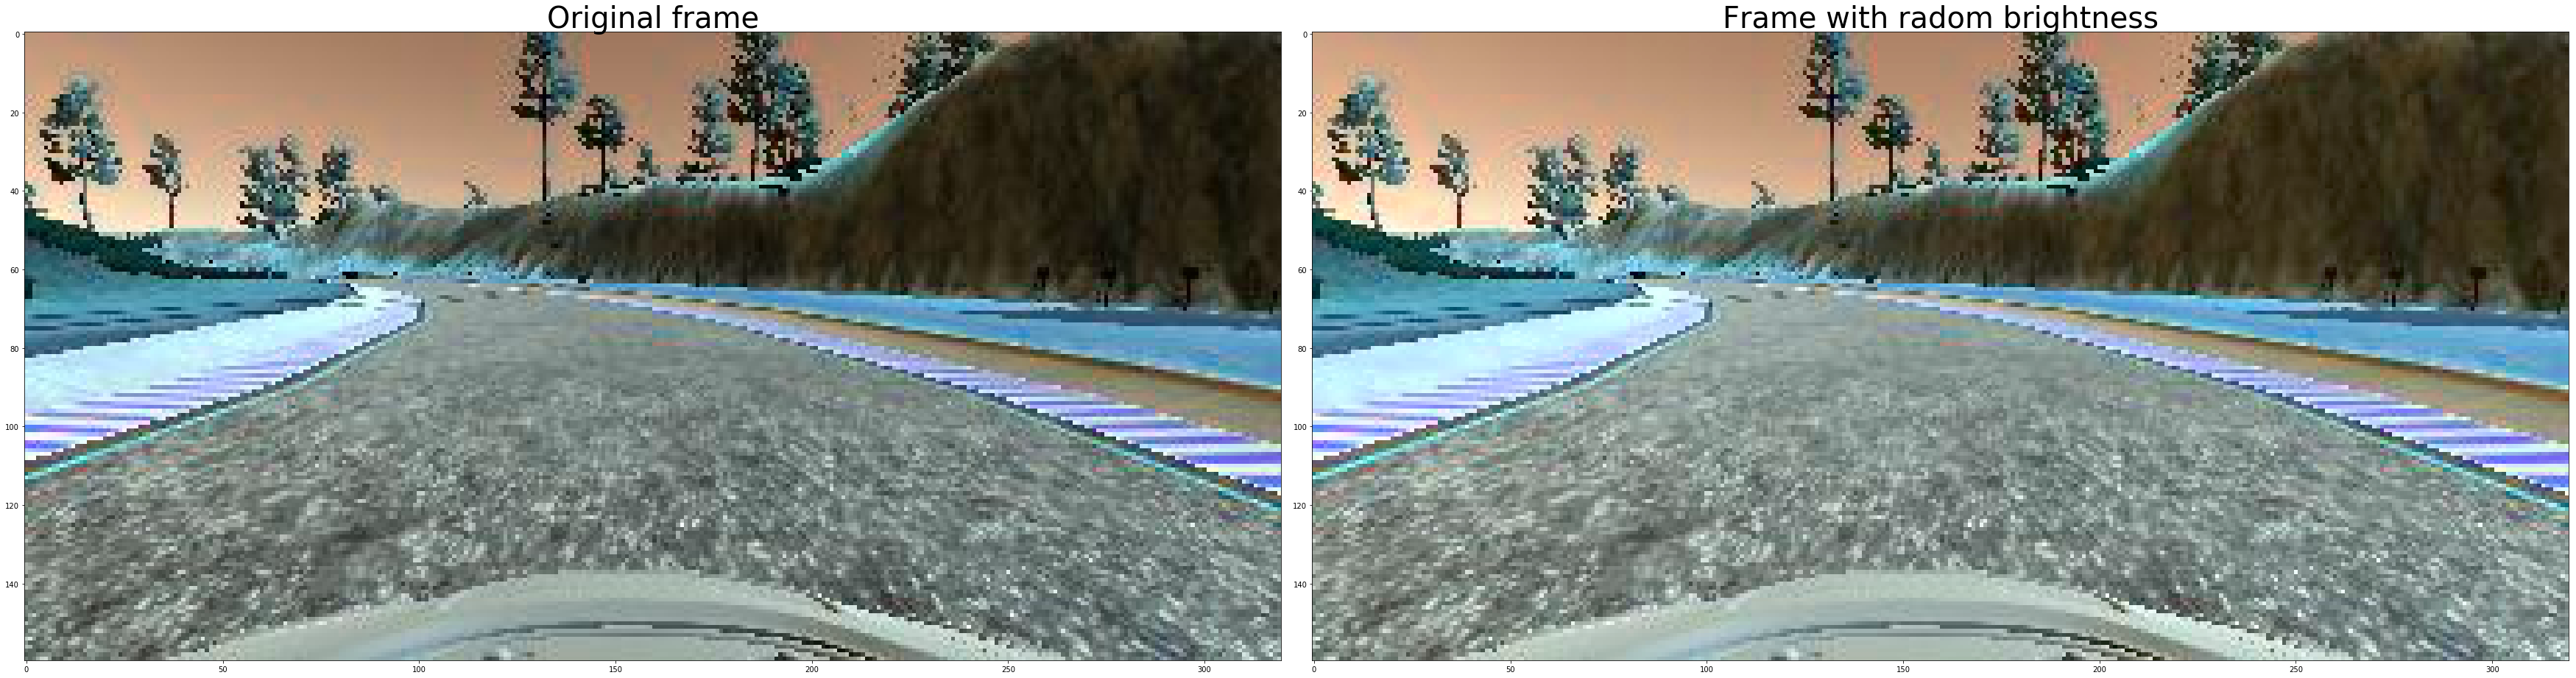

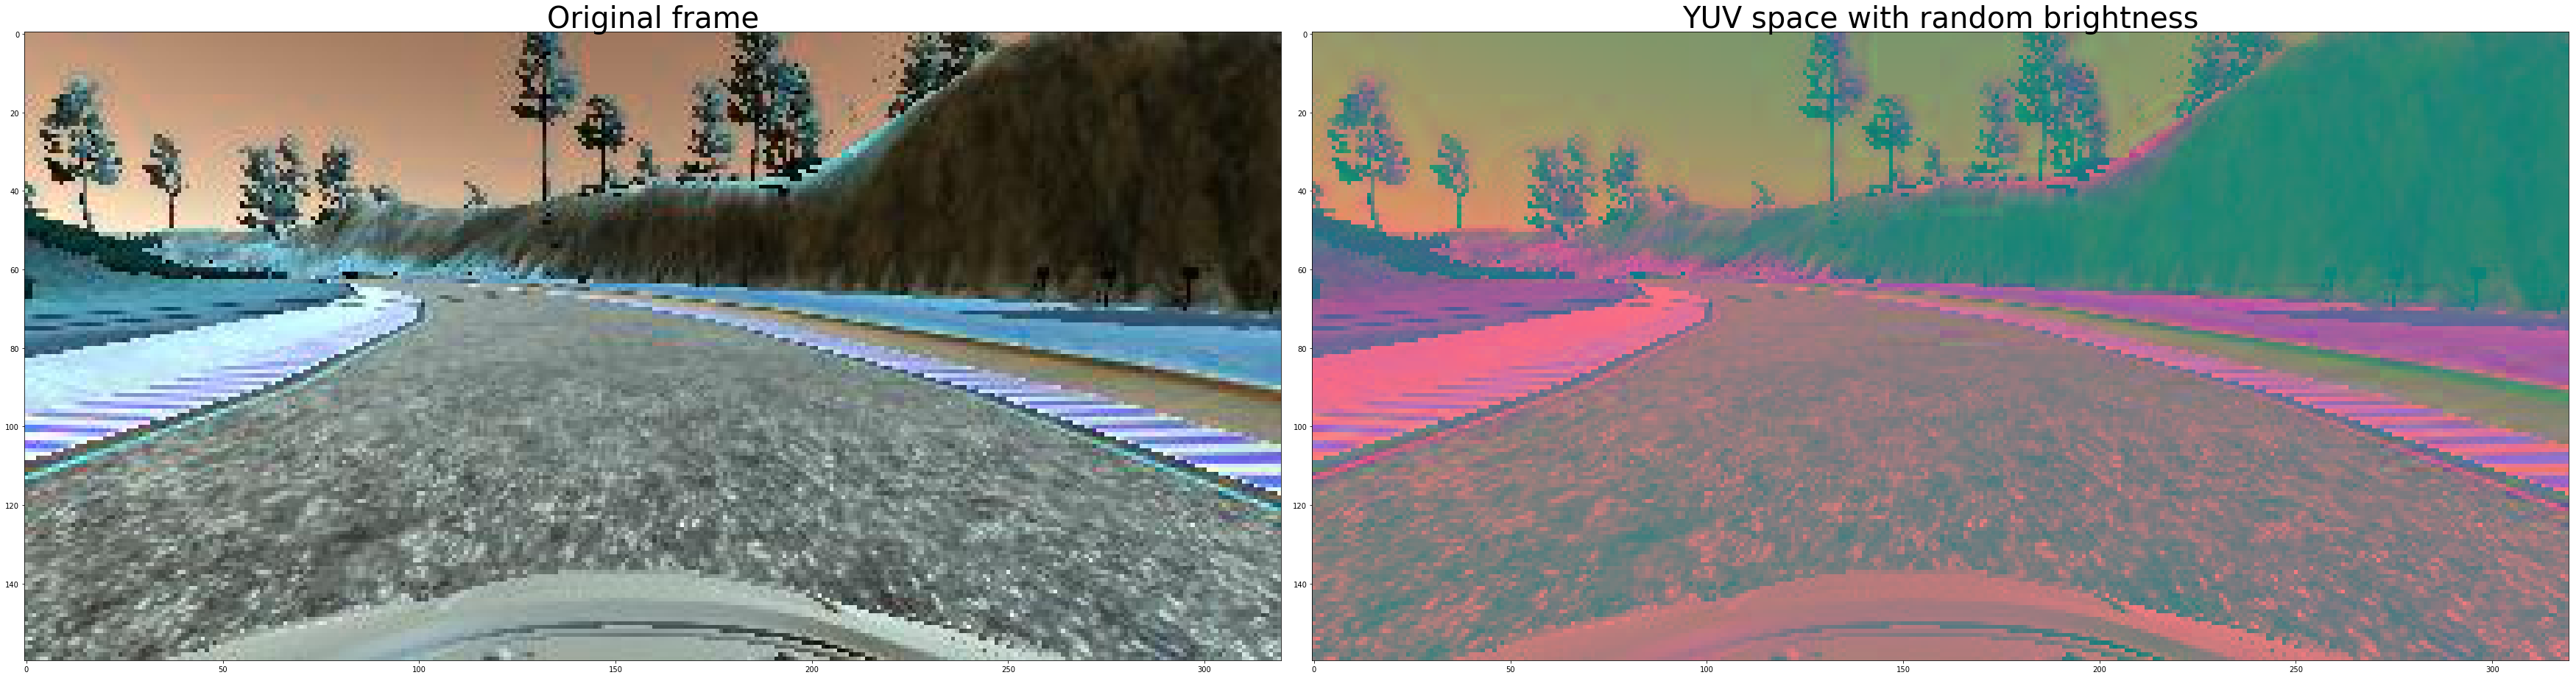

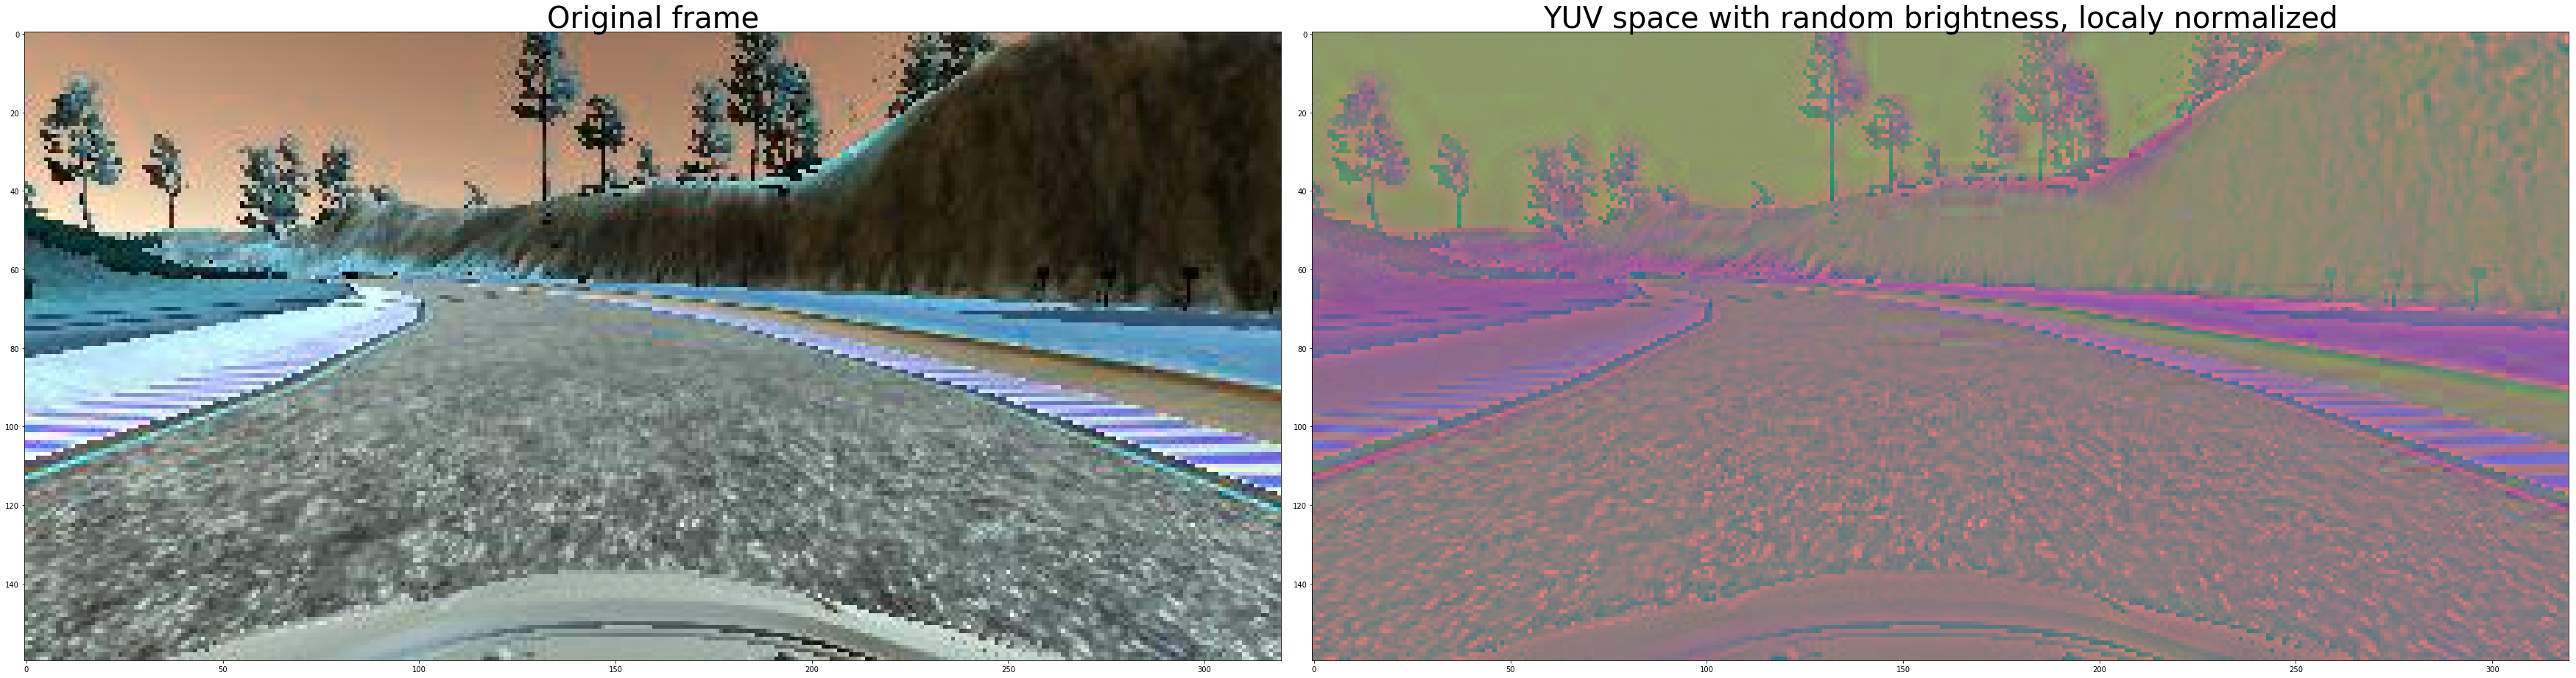

In [16]:
img = cv2.imread('train/IMG/center_2018_08_15_21_05_24_058.jpg')


compare_images(img, yuv_select(img), text1 = 'Original frame', text2 = 'yuv Channel Only')
compare_images(img, random_brightness(img), text1 = 'Original frame', text2 = 'Frame with radom brightness')
compare_images(img, yuv_select(random_brightness(img)), text1 = 'Original frame', text2 = 'YUV space with random brightness')
compare_images(img, yuv_select(local_normalize(random_brightness(img))), text1 = 'Original frame', text2 = 'YUV space with random brightness, localy normalized')

#  (8) Training the Model
### Data augmentation

As we oberved above in cobined overall data in (5), the data is not well spread. Training on that data did produce car taking enough -ve turn (values). 
As mentioned in the course work, I augmented the data with inserting the same images with flipped, and turn values being negated. 

the following notebook part is a code for generating the data which includes the augmentation, and visualization at each data that I collected.

It starts with Udacity's provided data, then I added the positive, negative and random 2 laps data I collected.

Histogram at each part is overall data so far, combining all the data sets for the current data of the block and the above one.
As you can see, the histogram does look like has most turn values, and it looks better spread.

In [17]:
images = [] #array to store the images
measurements = []  #array to store the turining angles.
left_correction = 0.27
right_correction = -0.27

### (9) Reading the data from the Udacity dataset, and histogram of it.

csv read complete. 
 now fetching images


<Container object of 35 artists>

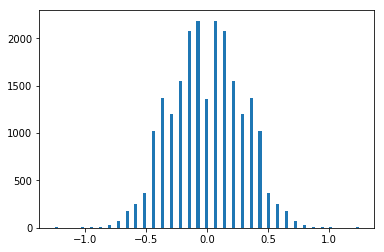

In [18]:
lines = []

with open('data/data/driving_log.csv') as csvfile:
    reader = csv.reader(csvfile)
    for line in reader:
        lines.append(line)
print("csv read complete. \n now fetching images")

for line in lines:
    source_path = line[0]
    image_name = source_path.split('/')[-1]
    image_path = 'data\\data\\IMG\\' + image_name
    img = cv2.imread(image_path)
    img = image_prepare(img)


    if abs(float(line[3])) != 0:
        images.append(img)
        measurment = float(line[3])
        measurements.append(measurment)
        image_flipped = np.fliplr(img)
        measurement_flipped = -measurment
        images.append(image_flipped)
        measurements.append(measurement_flipped)

    # left cam
    source_path = line[1]
    image_name = source_path.split('/')[-1]
    image_path = 'data\\data\\IMG\\' + image_name
    img = cv2.imread(image_path)
    img = image_prepare(img)

    if abs(float(line[3])) != 0:
        images.append(img)
        measurment = float(line[3]) + left_correction
        measurements.append(measurment)
        image_flipped = np.fliplr(img)
        measurement_flipped = -measurment
        images.append(image_flipped)
        measurements.append(measurement_flipped)

    # right cam
    source_path = line[2]
    image_name = source_path.split('/')[-1]
    image_path = 'data\\data\\IMG\\' + image_name
    img = cv2.imread(image_path)
    img = image_prepare(img)

    if abs(float(line[3])) != 0:
        images.append(img)
        measurment = float(line[3]) + right_correction
        measurements.append(measurment)
        image_flipped = np.fliplr(img)
        measurement_flipped = -measurment
        images.append(image_flipped)
        measurements.append(measurement_flipped)

hist, bins = np.histogram(measurements, 35)
height = (bins[:-1] + bins[1:]) / 2
plt.bar(height, hist, align='center', width= 0.025)

### (10) Adding Generic data collected with 2 laps, to the (9), and visualizing the combined histogram 

csv2 read complete. 
 now fetching images


<Container object of 35 artists>

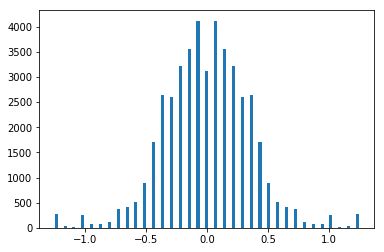

In [19]:
lines = []

with open('train/driving_log.csv') as csvfile:
    reader = csv.reader(csvfile)
    for line in reader:
        lines.append(line)
print("csv2 read complete. \n now fetching images")

for line in lines:
    source_path = line[0]
    image_name = source_path.split('\\')[-1]
    image_path = 'train\\IMG\\' + image_name
    img = cv2.imread(image_path)
    img = image_prepare(img)

    # flipped
    if abs(float(line[3])) != 0:
        images.append(img)
        measurment = float(line[3])
        measurements.append(measurment)
        image_flipped = np.fliplr(img)
        measurement_flipped = -measurment
        images.append(image_flipped)
        measurements.append(measurement_flipped)

    # left cam
    source_path = line[1]
    image_name = source_path.split('\\')[-1]
    image_path = 'train\\IMG\\' + image_name
    img = cv2.imread(image_path)
    img = image_prepare(img)

    if abs(float(line[3])) != 0:
        images.append(img)
        measurment = float(line[3]) + left_correction
        measurements.append(measurment)
        image_flipped = np.fliplr(img)
        measurement_flipped = -measurment
        images.append(image_flipped)
        measurements.append(measurement_flipped)

    # right cam
    source_path = line[2]
    image_name = source_path.split('\\')[-1]
    image_path = 'train\\IMG\\' + image_name
    img = cv2.imread(image_path)
    img = image_prepare(img)

    if abs(float(line[3])) != 0:
        images.append(img)
        measurment = float(line[3]) + right_correction
        measurements.append(measurment)
        image_flipped = np.fliplr(img)
        measurement_flipped = -measurment
        images.append(image_flipped)
        measurements.append(measurement_flipped)

hist, bins = np.histogram(measurements, 35)
height = (bins[:-1] + bins[1:]) / 2
plt.bar(height, hist, align='center', width= 0.025)

### (11) adding the positive turn data, to the above data (10), and displaying the histogram of the combined data so far

csv2 read complete. 
 now fetching images


<Container object of 35 artists>

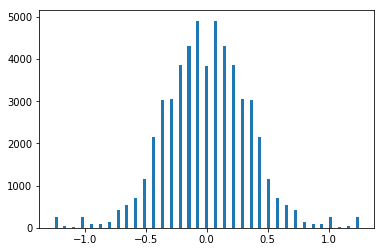

In [20]:
lines = []

with open('train1/driving_log.csv') as csvfile:
    reader = csv.reader(csvfile)
    for line in reader:
        lines.append(line)
print("csv2 read complete. \n now fetching images")

for line in lines:
    source_path = line[0]
    image_name = source_path.split('\\')[-1]
    image_path = 'train1\\IMG\\' + image_name
    img = cv2.imread(image_path)
    img = image_prepare(img)

    if abs(float(line[3])) != 0:
        images.append(img)
        measurment = float(line[3])
        measurements.append(measurment)
        image_flipped = np.fliplr(img)
        measurement_flipped = -measurment
        images.append(image_flipped)
        measurements.append(measurement_flipped)

    # left cam
    source_path = line[1]
    image_name = source_path.split('\\')[-1]
    image_path = 'train1\\IMG\\' + image_name
    img = cv2.imread(image_path)
    img = image_prepare(img)

    if abs(float(line[3])) != 0:
        images.append(img)
        measurment = float(line[3]) + left_correction
        measurements.append(measurment)
        image_flipped = np.fliplr(img)
        measurement_flipped = -measurment
        images.append(image_flipped)
        measurements.append(measurement_flipped)

    # right cam
    source_path = line[2]
    image_name = source_path.split('\\')[-1]
    image_path = 'train1\\IMG\\' + image_name
    img = cv2.imread(image_path)
    img = image_prepare(img)

    if abs(float(line[3])) != 0:
        images.append(img)
        measurment = float(line[3]) + right_correction
        measurements.append(measurment)
        image_flipped = np.fliplr(img)
        measurement_flipped = -measurment
        images.append(image_flipped)
        measurements.append(measurement_flipped)

hist, bins = np.histogram(measurements, 35)
height = (bins[:-1] + bins[1:]) / 2
plt.bar(height, hist, align='center', width= 0.025)

### (12) adding the positive turn data, to the above data (11), and displaying the histogram of the combined data.
### The histogram is the overall data, after augmentation

csv2 read complete. 
 now fetching images


<Container object of 35 artists>

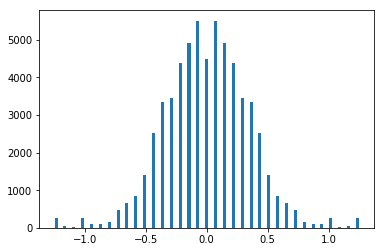

In [21]:
lines = []

with open('train2/driving_log.csv') as csvfile:
    reader = csv.reader(csvfile)
    for line in reader:
        lines.append(line)
print("csv2 read complete. \n now fetching images")

for line in lines:
    source_path = line[0]
    image_name = source_path.split('\\')[-1]
    image_path = 'train2\\IMG\\' + image_name
    img = cv2.imread(image_path)
    img = image_prepare(img)

    if abs(float(line[3])) != 0:
        images.append(img)
        measurment = float(line[3])
        measurements.append(measurment)
        image_flipped = np.fliplr(img)
        measurement_flipped = -measurment
        images.append(image_flipped)
        measurements.append(measurement_flipped)

    # left cam
    source_path = line[1]
    image_name = source_path.split('\\')[-1]
    image_path = 'train2\\IMG\\' + image_name
    img = cv2.imread(image_path)
    img = image_prepare(img)

    if abs(float(line[3])) != 0:
        images.append(img)
        measurment = float(line[3]) + left_correction
        measurements.append(measurment)
        image_flipped = np.fliplr(img)
        measurement_flipped = -measurment
        images.append(image_flipped)
        measurements.append(measurement_flipped)

    # right cam
    source_path = line[2]
    image_name = source_path.split('\\')[-1]
    image_path = 'train2\\IMG\\' + image_name
    img = cv2.imread(image_path)
    img = image_prepare(img)

    if abs(float(line[3])) != 0:
        images.append(img)
        measurment = float(line[3]) + right_correction
        measurements.append(measurment)
        image_flipped = np.fliplr(img)
        measurement_flipped = -measurment
        images.append(image_flipped)
        measurements.append(measurement_flipped)

hist, bins = np.histogram(measurements, 35)
height = (bins[:-1] + bins[1:]) / 2
plt.bar(height, hist, align='center', width= 0.025)

As it can be seen above, from the width of the bar between 0.0 and -0.5, I have a bit of a thick bar. 
This does indicate that the data for that bin is slightly higher.

### (13) Store the data as numpy array for training purpose.
### Images are stored as 'np_data_imgages.npk' and respective turns are stored as 'np_data_maesurments.npk'

In [22]:

print("imags fetching complete")
X_train = np.array(images)
y_train = np.array(measurements)
print("arrays created,\now saving arrays")
np.save('np_data_imgages', X_train)
np.save('np_data_maesurments', y_train)
print ("Arrays saved.\n Go ahead for training the model")

imags fetching complete
arrays created,
ow saving arrays
Arrays saved.
 Go ahead for training the model


### NVIDIA's CNN Architecture. The  network  has  about  27  million  connections  and  250  thousand parameters.

![CNN Architecture from NVIDIA [1]](../CarND-Behavioral-Cloning-P3-master/images/NVIDIA_model.PNG)

I used the  architecture from the NVIDIA paper [1]. The kernel, and the strides values used were the same.
Activation function used is Relu.
I tried using ELU, but it Relu outperformed it, and the car was more stable. My final model uses Relu.  

As per [1], images were converted to 'yuv' channel, and size was reduced to (66x200). The top and bottom of the images was reduced before resizing.
I was observed that the images did good with Localy normalizing them. I tried both, i.e. with localy normalizing and without. both the ways worked fairly ok. I belive the shadows were well reduced by local normalization. 

As [1] suggest, random brightness was added. images were not rescaled or tilted randomly, as I felt it was not needed for the simulator, as the camera angle is going to be fixed.

The data is normalized within the Keras model. 

    model.add(Lambda(lambda x: x / 127.5 - 1, input_shape=(66, 200, 3)))
    
As per the above diagram model of the architecture, 5 Convolution and 3 Dense layers were used. pooling was not used, as we needed to preserve the data. 
    
As a part of avoiding the overfitting, two factors were useful. 
1. Epochs
2. Ridge regression(l2) for penalty.

model overfitted, and took accute turns when then number of epochs were set to 5 or more. I set it to 2, and the model produced better results. Dropouts did not work when I gave several trials. 

Since the data was large, Adam optimizer worked best here. 


Also, training data was only split into Train and Validation data. 
Using the test data, and accuracy did not specify any meaningful value to me. lower or higher the test accuracy, that did not clearly give idea of how the car would drive. I hence chose to not split data for testing, and instead use it for training purpose.


Summery of the model is as below:

![CNN Architecture from NVIDIA [1]](../CarND-Behavioral-Cloning-P3-master/images/model.PNG)

Besides all above, I also tried keras ImageDataGenerator, fit_generator functions. it didn't give me or rather I could not come to satisfactory outputs with it.


#### Reference:
[1] End to End Learning for Self-Driving Cars